In [1]:
!pip install holoviews

In [2]:
!pip install networkx

In [29]:
import re
import requests
import pandas as pd
import holoviews as hv
import networkx as nx
from holoviews import opts
from bs4 import BeautifulSoup
from urllib.request import urljoin
import numpy as np
from urllib.parse import urlparse

In [46]:
def get_google_service_name(url):
    parsed_url = urlparse(url)
    subdomain = parsed_url.netloc.split('.')[0]
    return subdomain

In [47]:
sites = "https://www.google.com/" #@param {type:"string"}
depth = 3 #@param {type:"slider", min:1, max:10, step:1}
max_child = 10 #@param {type:"slider", min:1, max:100, step:1}

def crawl(sites, depth=1, current_depth=0, max_child=10):
    get_links = lambda site: pd.Series(urljoin(site, tag.get('href')) for tag in BeautifulSoup(requests.get(site).text).find_all('a')).drop_duplicates().head(max_child)
    sites = pd.concat([sites,pd.DataFrame([{'link': link, 'parent': site, 'depth': current_depth + 1}
                                          for site in sites[sites.depth == current_depth].link
                                          for link in get_links(site)])],ignore_index=True).drop_duplicates('link')


    if depth > current_depth + 1:
        return crawl(sites, depth=depth, current_depth=current_depth+1, max_child=max_child)
    else:
        return sites


result = crawl(sites=pd.DataFrame([{'link': site, 'depth': 0, 'parent': site} for site in sites.split()]), 
               max_child=max_child,
               depth=depth)

In [48]:
result

,link,depth,parent
0,https://www.google.com/,0,https://www.google.com/
1,https://www.google.com/imghp?hl=km&tab=wi,1,https://www.google.com/
2,https://maps.google.com.kh/maps?hl=km&tab=wl,1,https://www.google.com/
3,https://play.google.com/?hl=km&tab=w8,1,https://www.google.com/
4,https://news.google.com/?tab=wn,1,https://www.google.com/
...,...,...,...
489,https://accounts.google.com/ServiceLogin?hl=en...,3,https://support.google.com/websearch/?p=displa...
492,https://support.google.com/websearch/community...,3,https://support.google.com/websearch/?p=displa...
495,https://support.google.com/websearch/?p=result...,3,https://support.google.com/websearch/?p=result...
499,https://accounts.google.com/ServiceLogin?hl=en...,3,https://support.google.com/websearch/?p=result...


In [24]:
# this is just the example scenarios
# from the results you can see the links "https://support.google.com/websearch", "https://play.google.com"
# it could be the all services google site

In [94]:
#Task : write the regular expression to get all the services of google
services = [get_google_service_name(x) for x in np.asarray(result['link'])]
while services.count('www') > 0:
    services.remove('www')
df_services = pd.DataFrame(services).value_counts().to_frame()

In [101]:
df_services.set_index(df_services.index.rename('index'), inplace=True)

In [102]:
df_services

,count
index,
accounts,29
support,24
play,22
news,17
drive,17
sustainability,11
safety,11
crisisresponse,8
myaccount,8


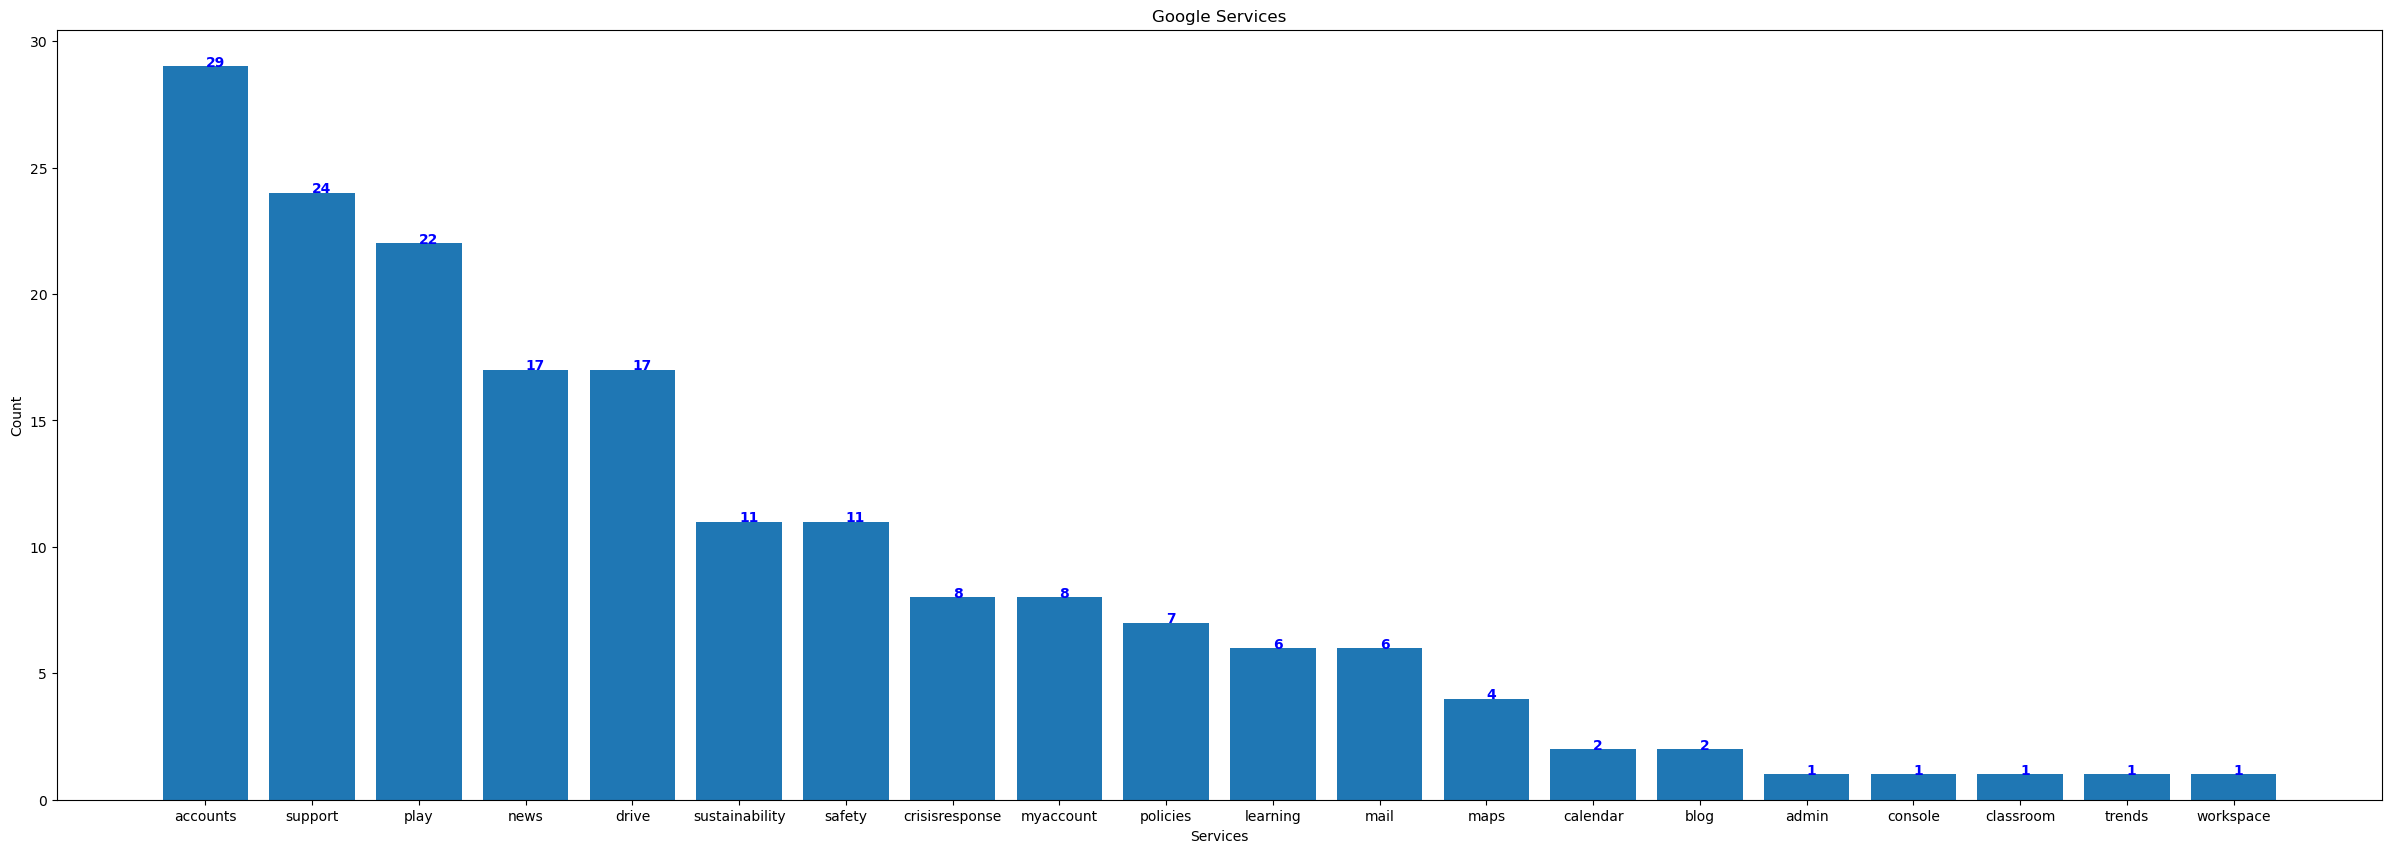

In [119]:
#Task : Visualize the services : - how many services that google have?
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.bar(df_services.index, df_services['count'])
plt.title('Google Services')
plt.xlabel('Services')
plt.ylabel('Count')
#show number of services
for i, v in enumerate(df_services['count']):
    plt.text(i, v, str(v), color='blue', fontweight='bold')

In [66]:
services

{'accounts',
 'admin',
 'blog',
 'calendar',
 'classroom',
 'console',
 'crisisresponse',
 'drive',
 'learning',
 'mail',
 'maps',
 'myaccount',
 'news',
 'play',
 'policies',
 'safety',
 'support',
 'sustainability',
 'trends',
 'workspace'}

The service name is: maps
